In [1]:
# Cell 1: Setup, Clone Repository, and Initialize Predictor
# How to change GPU: 1. Click right-top option button. 2. Choose "Change Run Time Type". 3. Choose GPU (T4 GPU or A100 GPU)
!pip install git+https://github.com/facebookresearch/sam2.git ipycanvas --quiet
!git clone https://github.com/koliangyu99/VisiCut.git
import sys
sys.path.append('/content/VisiCut')
import visicut_core
from google.colab import files
predictor = visicut_core.setup_sam_predictor()
print(f"Colab Notebook: Predictor object: {type(predictor)}")

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


sam2_hiera_large.pt:   0%|          | 0.00/898M [00:00<?, ?B/s]

✅ SAM-2 Predictor initialized.
Colab Notebook: Predictor object: <class 'sam2.sam2_image_predictor.SAM2ImagePredictor'>


# ***Cell 1 is for initial setup only. After executing it once, proceed by repeating Cells 2-5.***

In [2]:
# Cell 2: Upload and Prepare Image
# Click "Choose Files" Button and upload your image file.
# This cell needs to be run for each new image you want to process.
filename, pil_image_obj, image_np = visicut_core.upload_and_prepare_image(predictor)
print(f"Colab Notebook: Image filename: {filename}")
print(f"Colab Notebook: PIL Image object: {type(pil_image_obj)}")
print(f"Colab Notebook: NumPy image array shape: {image_np.shape}")

Please upload an image file (e.g., JPG, PNG, GIF, BMP, TIFF).


Saving 圖片 1.png to 圖片 1.png
✅ Image '圖片 1.png' uploaded and set for prediction.
Colab Notebook: Image filename: 圖片 1.png
Colab Notebook: PIL Image object: <class 'PIL.PngImagePlugin.PngImageFile'>
Colab Notebook: NumPy image array shape: (675, 504, 3)


In [3]:
# Cell 3: Interactive Pointing on Canvas
# After running this cell, click directly on the object(s) in the image above
# to define your segmentation points. The dot color is Green.
visicut_core.setup_interactive_canvas(pil_image_obj)

MultiCanvas(height=675, width=504)

Click directly on object/image; The Dot Color is Lime.
Canvas dimensions (W, H): 504, 675
Type of object drawn: <class 'PIL.PngImagePlugin.PngImageFile'> (converted to <class 'ipywidgets.widgets.widget_media.Image'>)

Instructions: Click on the object(s) in the image above to define your segmentation points. Then, run the next cell.


Predicting mask with 1 points...


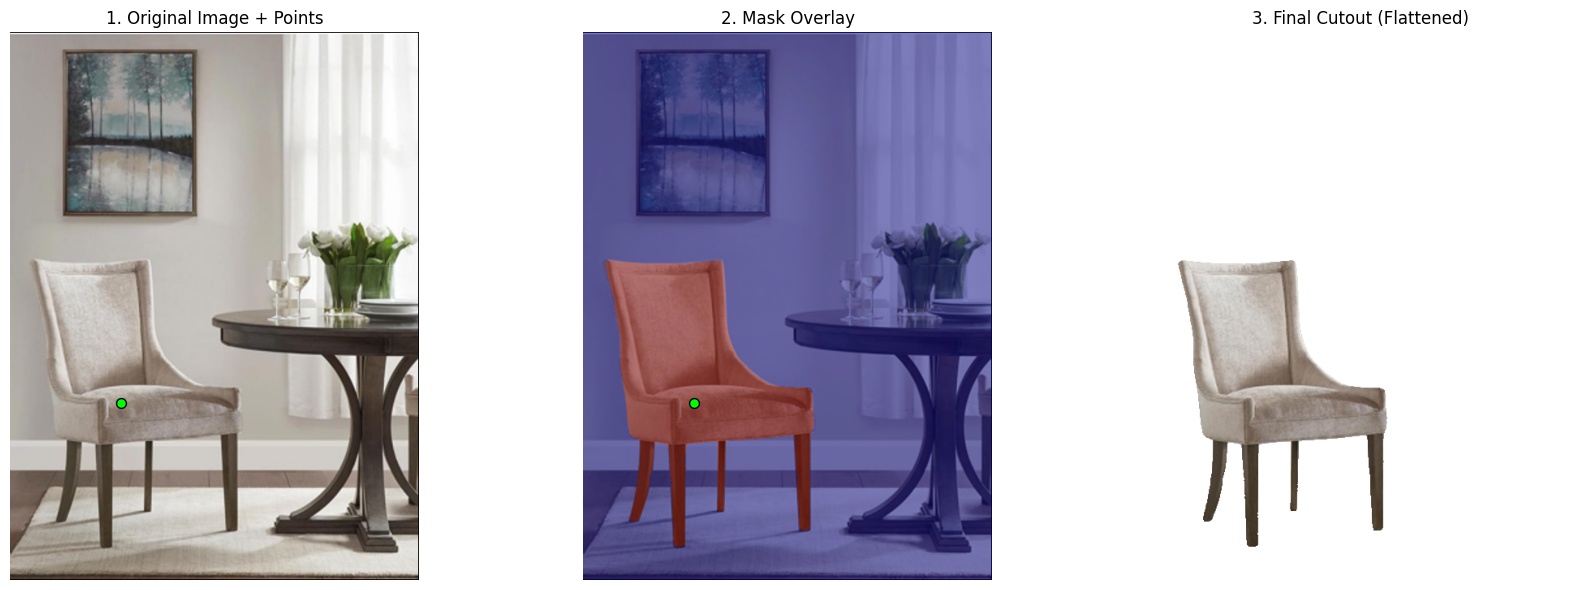

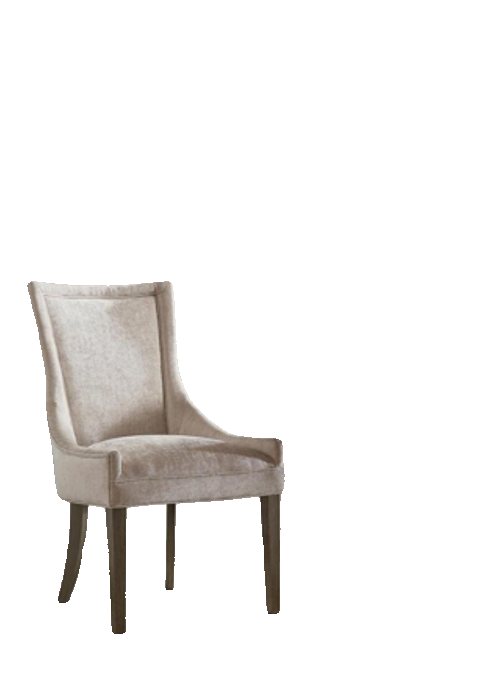

✅ Mask generated and flattened cutout displayed.
Colab Notebook: Masks shape: (675, 504)
Colab Notebook: Result PIL Image: <class 'PIL.Image.Image'>


In [4]:
# Cell 4: Run SAM-2 and Visualize Results
masks, result_pil_image = visicut_core.run_sam_and_visualize(predictor, image_np)
print(f"Colab Notebook: Masks shape: {masks[0].shape}")
print(f"Colab Notebook: Result PIL Image: {type(result_pil_image)}")

In [5]:
# Cell 5: Saving and Direct Download of Cutout Image
# This cell saves the cutout to your Colab environment and initiates a download to your local machine.
visicut_core.save_cutout(filename, result_pil_image)

✅ Saved cutout to Colab files as sam2_圖片 1.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

⬇️ Initiating download for sam2_圖片 1.png...
